Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


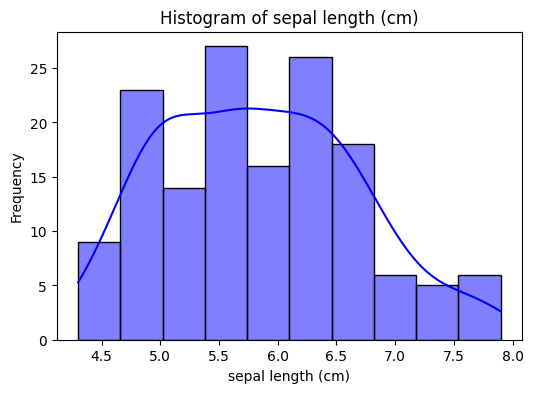

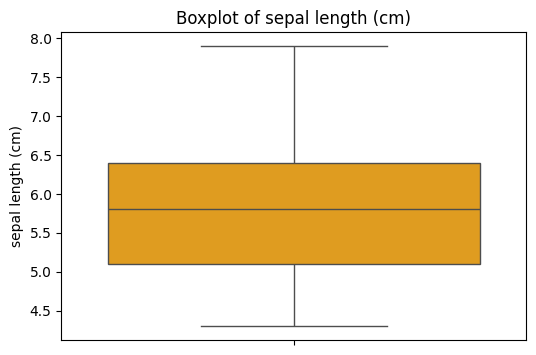

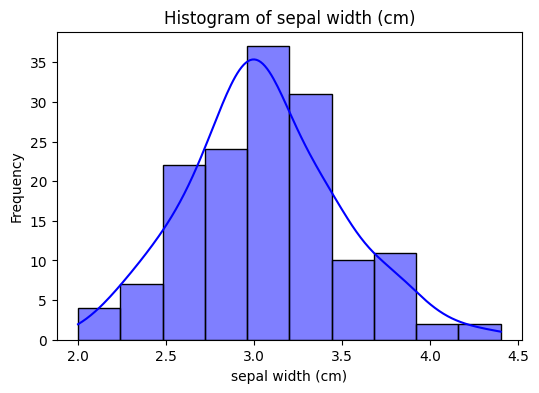

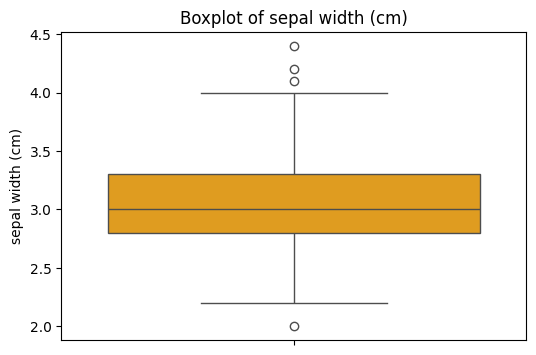

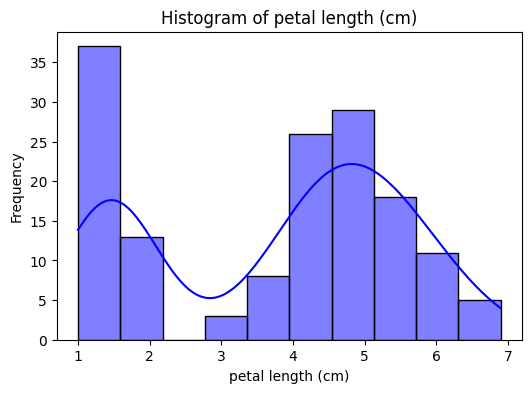

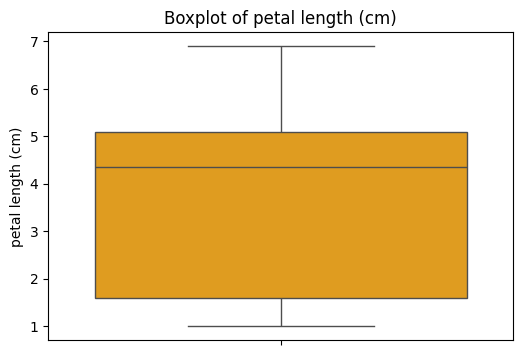

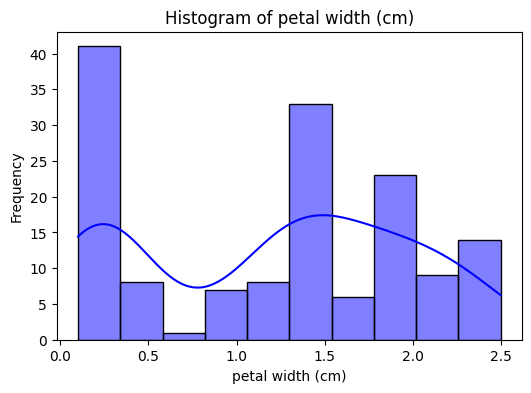

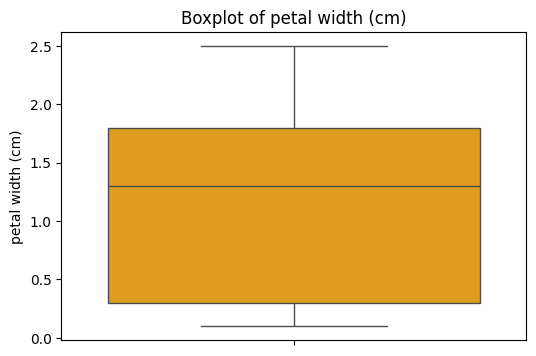


Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


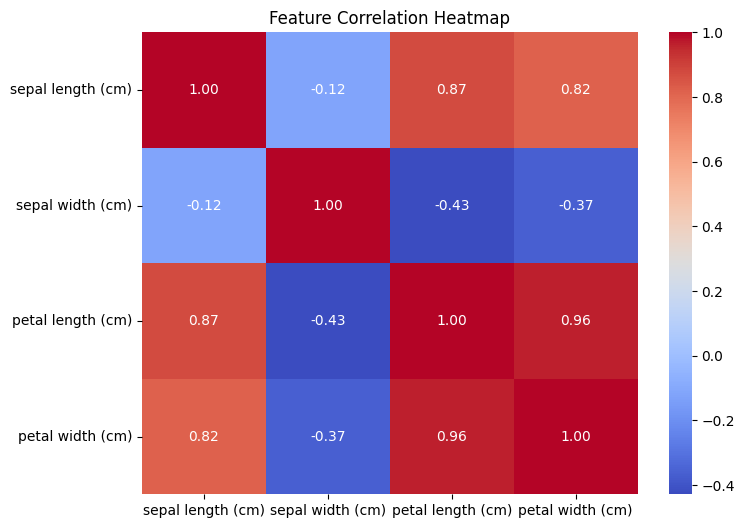

In [1]:
### Task 1: Descriptive Statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris Dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Compute mean, median, and standard deviation for all numerical features
print("Mean:\n", data.mean())
print("\nMedian:\n", data.median())
print("\nStandard Deviation:\n", data.std())

# Create histograms and boxplots for feature distributions
for column in data.columns:
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

# Calculate the correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [2]:
### Task 2: Conditional Probability
# Given table:
# |                |    B                  |        not B         |
# |  A            |         30          |          20            |
# | not A      |           50        |         100           |

def conditional_probability():
    # Total values
    total = 200
    
    # P(A|B)
    p_a_given_b = 30 / (30 + 50)
    print(f"P(A|B) = {p_a_given_b:.2f}")

    # P(B|A)
    p_b_given_a = 30 / (30 + 20)
    print(f"P(B|A) = {p_b_given_a:.2f}")

conditional_probability()


P(A|B) = 0.38
P(B|A) = 0.60


In [3]:
### Task 3: Bayes' Theorem
# Given probabilities
# P(Spam)=0.2
# P(Not Spam)=0.8
# P(Keyword | Spam)=0.7
# P(Keyword | Not Spam)=0.1

def bayes_theorem():
    p_spam = 0.2
    p_not_spam = 0.8
    p_keyword_given_spam = 0.7
    p_keyword_given_not_spam = 0.1

    # Total probability of Keyword
    p_keyword = (p_keyword_given_spam * p_spam) + (p_keyword_given_not_spam * p_not_spam)

    # P(Spam|Keyword)
    p_spam_given_keyword = (p_keyword_given_spam * p_spam) / p_keyword
    print(f"P(Spam|Keyword) = {p_spam_given_keyword:.2f}")

bayes_theorem()

P(Spam|Keyword) = 0.64


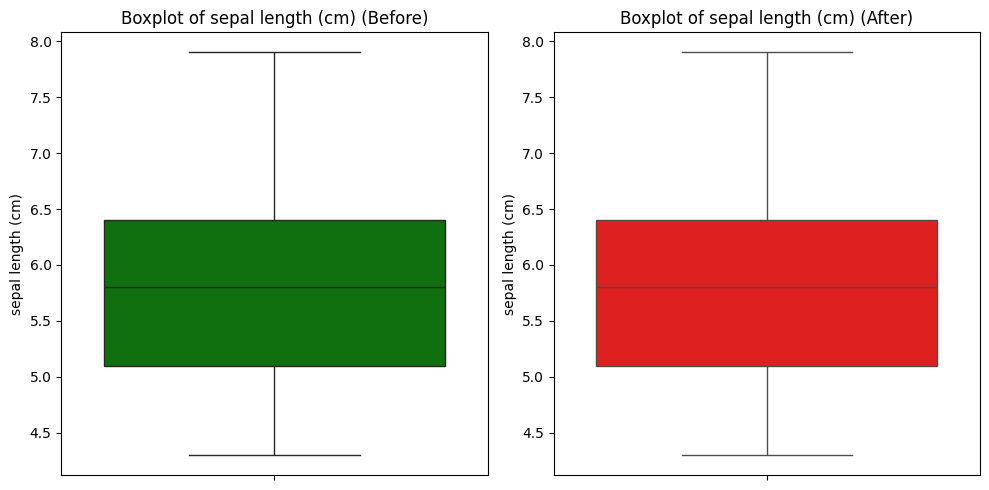

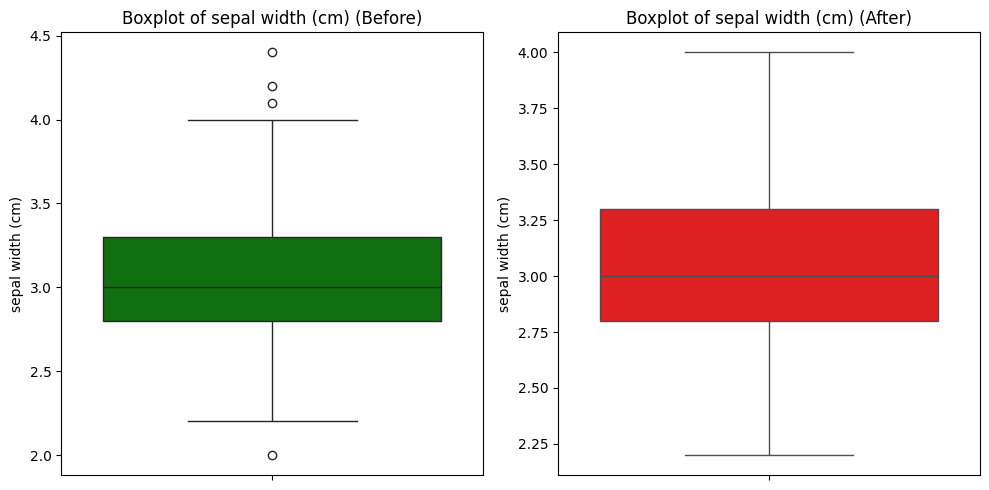

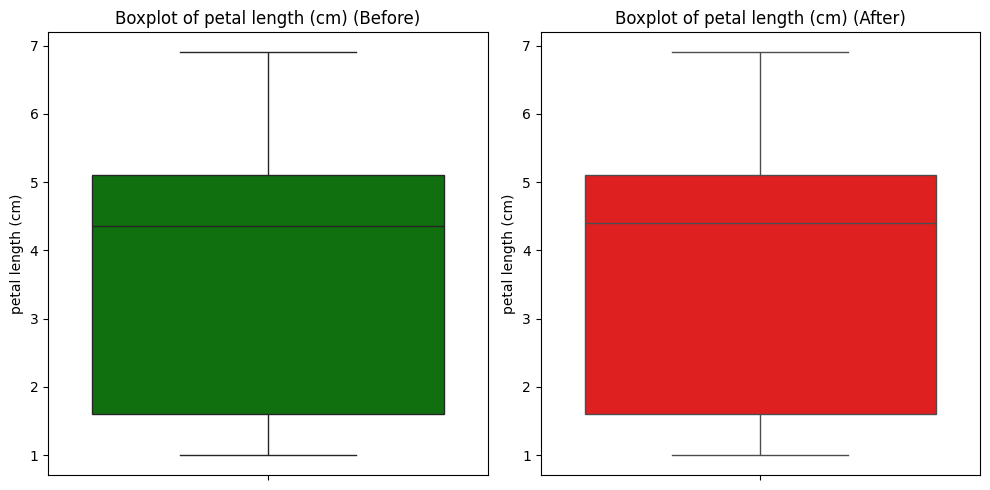

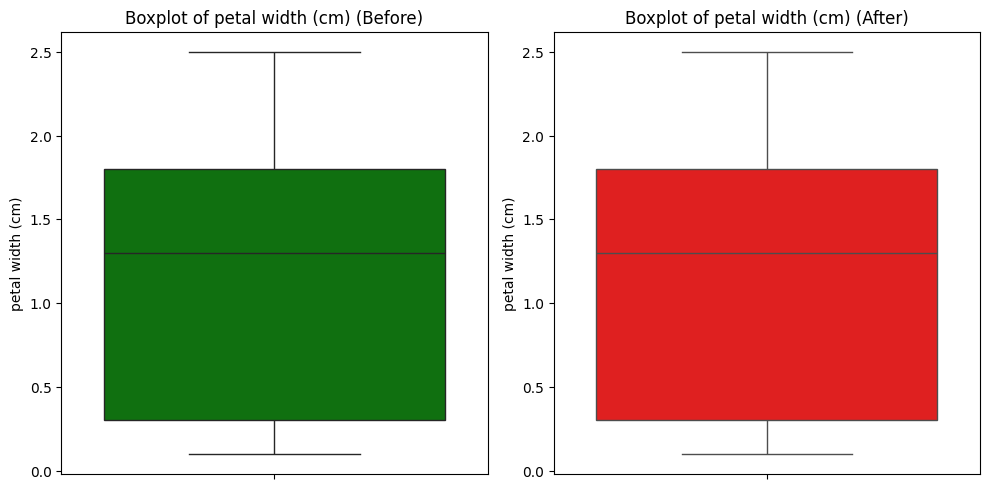

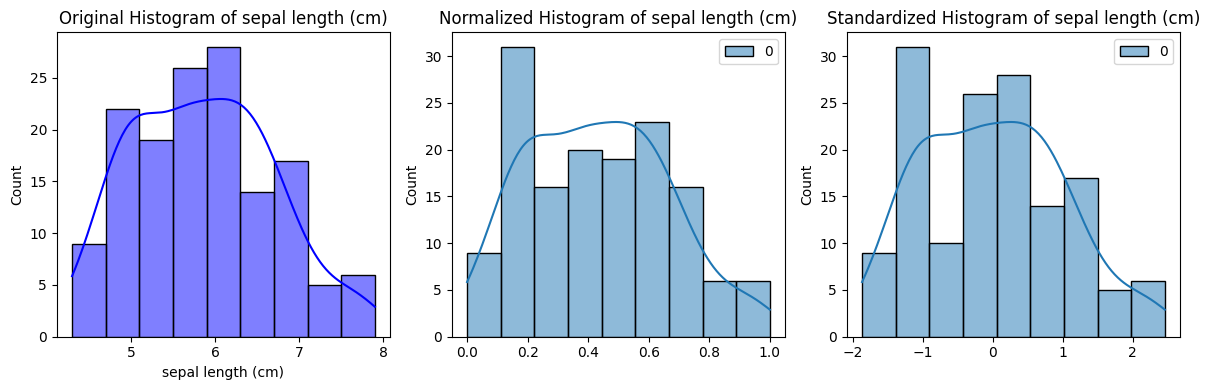

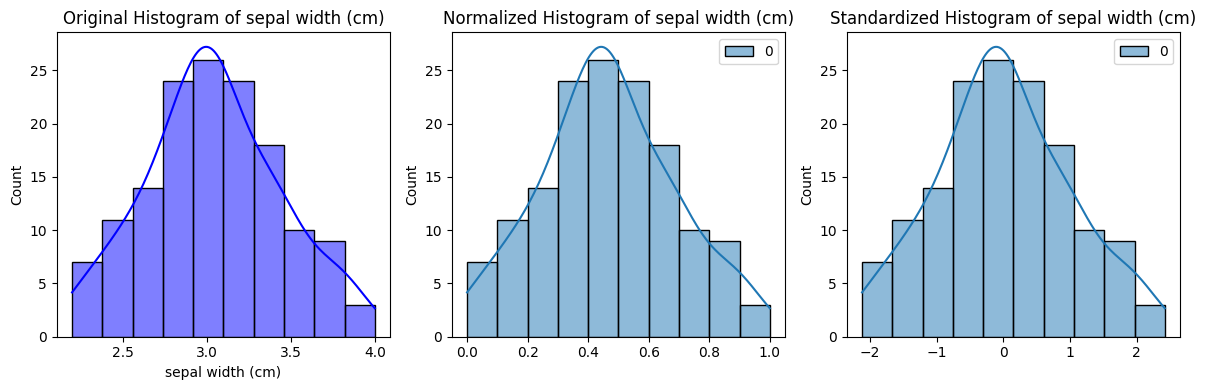

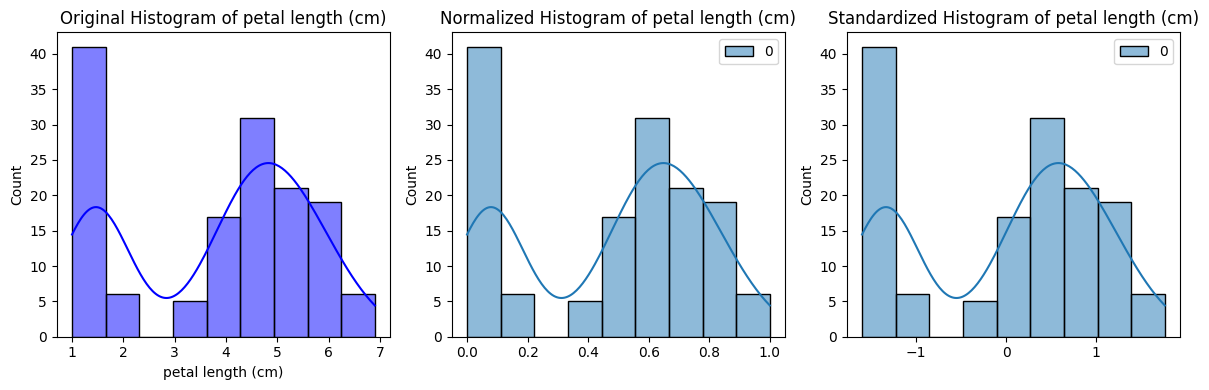

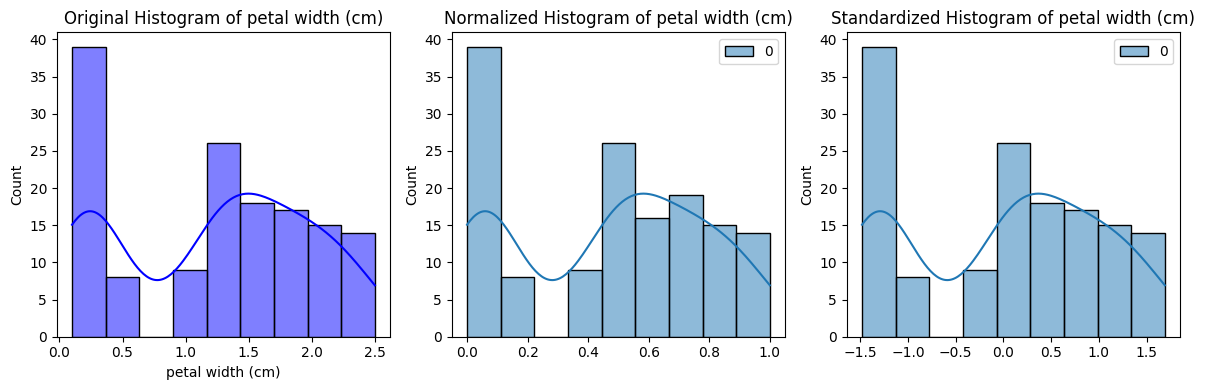

In [4]:
### Task 4: Outlier Detection, Removal, and Feature Scaling
# Load Iris Dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def outlier_detection(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detecting and removing outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Detect and remove outliers
data_cleaned = outlier_detection(data.copy())

# Boxplots before and after outlier removal
for column in data.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column], color='green')
    plt.title(f'Boxplot of {column} (Before)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned[column], color='red')
    plt.title(f'Boxplot of {column} (After)')

    plt.tight_layout()
    plt.show()

# Histograms before and after normalization and standardization
scaler = MinMaxScaler()
standardizer = StandardScaler()

for column in data_cleaned.columns:
    scaled_data = scaler.fit_transform(data_cleaned[[column]])
    standardized_data = standardizer.fit_transform(data_cleaned[[column]])

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(data_cleaned[column], kde=True, color='blue')
    plt.title(f'Original Histogram of {column}')

    plt.subplot(1, 3, 2)
    sns.histplot(scaled_data, kde=True, color='purple')
    plt.title(f'Normalized Histogram of {column}')

    plt.subplot(1, 3, 3)
    sns.histplot(standardized_data, kde=True, color='orange')
    plt.title(f'Standardized Histogram of {column}')

    plt.tight_layout()
    plt.show()
